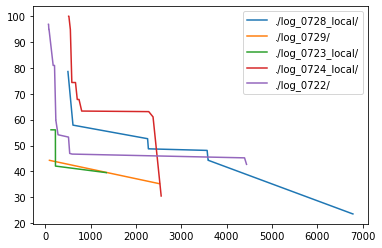

In [1]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

def get_timestamp(s):
    return datetime.strptime(s.split(" ")[0], '%H:%M:%S.%f')

for log in os.listdir("."):
    if not log.startswith("log"):
        continue
    dir_name = ("./" + log + "/") 
    log_file = dir_name + os.listdir(dir_name)[1]
    with open(log_file) as f:
        content = f.read()
    lines = [l for l in content.split("\n") if l.find("solution") != -1]
    start = get_timestamp(content.split("\n")[0])
    time = []
    costs = []
    for i in range(len(lines)):
        line = lines[i]
        cost = re.findall(r' [0-9][0-9].[0-9][0-9][0-9][0-9]', line)
        if not cost:
            continue
            
        if (get_timestamp(line) -start).total_seconds() < 0:
            time.append((get_timestamp(line) -start + timedelta(days=1)).total_seconds())
        else:
            time.append((get_timestamp(line) -start).total_seconds())
        costs.append(float(cost[0].strip()))

    plt.xlabel = "cost"
    plt.plot(time, costs, label = dir_name)
    plt.legend()
    plt.savefig("result.png")

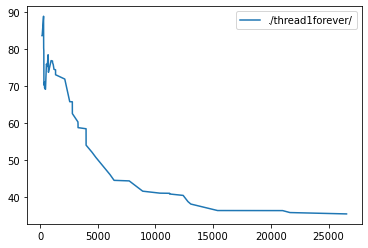

In [7]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import numpy as np
from operator import itemgetter

total_trial_number = 6

def get_timestamp(s):
    return datetime.strptime(s.split(" ")[0], '%H:%M:%S.%f')

def parse_log_file(dir_name, log_name):
    log_file = dir_name + log_name
    with open(log_file) as f:
        content = f.read()
    lines = [l for l in content.split("\n") if l.find("solution") != -1]
    start = get_timestamp(content.split("\n")[0])
    time = []
    costs = []
    for i in range(len(lines)):
        line = lines[i]
        cost = re.findall(r' [0-9][0-9].[0-9][0-9][0-9][0-9]', line)
        if not cost:
            continue
            
        if (get_timestamp(line) -start).total_seconds() < 0:
            time.append((get_timestamp(line) -start + timedelta(days=1)).total_seconds())
        else:
            time.append((get_timestamp(line) -start).total_seconds())
        costs.append(float(cost[0].strip()))
    return costs, time 


for log in os.listdir("."):
    if not log.startswith("t"):
        continue
    dir_name = "./" + log +"/"
    l = []
    for log_name in os.listdir(dir_name):
        if not log_name.endswith("0"):
            continue
        costs, times = parse_log_file(dir_name, log_name )
        if not costs: 
            log_name = log_name[:-1] + '1'
            costs, times = parse_log_file(dir_name, log_name)
            if not costs: 
                log_name = log_name[:-1] + '2'
                costs, times = parse_log_file(dir_name, log_name)
                if not costs: 
                    log_name = log_name[:-1] + '3'
                    costs, times = parse_log_file(dir_name, log_name)
        trial_number = int(log_name[8])
        #nthread = int(log_name[18])
        for i in range(len(times)):
            arr = np.empty((total_trial_number,))
            arr[:] = np.NaN
            arr[trial_number] = costs[i]
            l.append([times[i], arr, trial_number])

    l = sorted(l,key=itemgetter(0))
    final_time = []
    final_cost = []
    for i in range(1, len(l)):
        old_arr = l[i-1]
        old_arr[1][l[i][2]] = l[i][1][l[i][2]]
        old_arr[0] = l[i][0]
        old_arr[2] = l[i][2]
        l[i] = old_arr.copy()
        final_time.append(old_arr[0])
        final_cost.append(np.nanmean(old_arr[1]))
        
    plt.plot(final_time, final_cost, label = dir_name)   
    plt.legend()

[['\n89.17488098144531, 121.14802344306472\n', '\n97.23023748397827, 119.41606866308635\n', '\n101.25828981399536, 103.7093511817013\n', '\n107.30000114440918, 99.57323790485415\n', '\n119.38281345367432, 96.48776467261462\n', '\n191.88210439682007, 94.4035218198672\n', '\n203.96542930603027, 94.31206064511218\n', '\n236.18699598312378, 86.13159466468451\n', '\n244.2425980567932, 79.09527351206545\n', '\n808.1913559436798, 68.47809663317176\n', '\n822.288135766983, 66.13222041313742\n', '\n842.4265425205231, 46.91120717276946\n']]
[['\n89.17488098144531, 121.14802344306472\n', '\n97.23023748397827, 119.41606866308635\n', '\n101.25828981399536, 103.7093511817013\n', '\n107.30000114440918, 99.57323790485415\n', '\n119.38281345367432, 96.48776467261462\n', '\n191.88210439682007, 94.4035218198672\n', '\n203.96542930603027, 94.31206064511218\n', '\n236.18699598312378, 86.13159466468451\n', '\n244.2425980567932, 79.09527351206545\n', '\n808.1913559436798, 68.47809663317176\n', '\n822.2881357

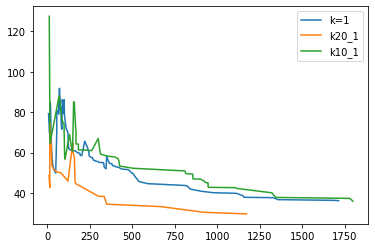

In [41]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import numpy as np
from operator import itemgetter


for log in os.listdir("."):
    if not log.startswith("k"):
        continue
    with open(log) as f:
        readed = f.read()
        experiments = []
        for line in readed.split("printing waypoints"):
            experiments.append(re.findall(r'\n[0-9]+.[0-9]+, [0-9]+.[0-9]+\n', line))
            print(experiments)

        total_trial_number = len(experiments)
        print(log, total_trial_number)
        l = []
        for trial_number in range(total_trial_number):
            costs = []
            times = []
            for i in (experiments[trial_number]):
                if not i:
                    continue
                print(i)
                splitted = i.split(", ")
                costs.append(float(splitted[1]))
                times.append(float(splitted[0]))

            for i in range(len(times)):
                arr = np.empty((total_trial_number,))
                arr[:] = np.NaN
                arr[trial_number] = costs[i]
                l.append([times[i], arr, trial_number])

        l = sorted(l,key=itemgetter(0))
        final_time = []
        final_cost = []
        for i in range(1, len(l)):
            old_arr = l[i-1]
            old_arr[1][l[i][2]] = l[i][1][l[i][2]]
            old_arr[0] = l[i][0]
            old_arr[2] = l[i][2]
            l[i] = old_arr.copy()
            final_time.append(old_arr[0])
            final_cost.append(np.nanmean(old_arr[1]))
        plt.plot(final_time, final_cost, label = log)   
        plt.legend()